In [1]:
from question4 import *
from comet_ml import Experiment
import os
from etape2_Q3 import *
import numpy as np
from sklearn.calibration import CalibrationDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score
from matplotlib.gridspec import GridSpec

In [24]:
my_key = os.environ.get("COMET_API_KEY")

In [25]:
exp = Experiment(api_key=my_key, project_name='ift-6758-a22', workspace='teylouniseifu' )

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/teylouniseifu/ift-6758-a22/3d45bcf29a3d44f1892f7c0a0a285537



In [2]:
directory2015 = r'data_saved/play_by_play/2015/regular'
directory2016 = r'data_saved/play_by_play/2016/regular'
directory2017 = r'data_saved/play_by_play/2017/regular'
directory2018 = r'data_saved/play_by_play/2018/regular'

In [5]:
from utils import *

dir = get_current_dir()
df2015 = create_full_df(directory2015, parent_dir=dir)
df2016 = create_full_df(directory2016, parent_dir=dir)
df2017 = create_full_df(directory2017, parent_dir=dir)
df2018 = create_full_df(directory2018, parent_dir=dir)

In [6]:
df_train = pd.concat([df2015, df2016, df2017], ignore_index=True)
df_val = df2018
df_train = df_train.dropna(subset="Distance")
df_val = df_val.dropna(subset="Distance")
df_total = pd.concat([df2015, df2016, df2017, df2018], ignore_index=True)
%store df_total

Stored 'df_total' (DataFrame)


In [7]:
X_train_d = df_train[["Distance","Angle", "Filet_vide"]]
y_train = df_train["Est_un_but"]
X_val_d = df_val[["Distance","Angle", "Filet_vide"]]
y_val_r = df_val["Est_un_but"]

In [8]:
model = DecisionTreeClassifier()

In [9]:
model.fit(X_train_d, y_train)

DecisionTreeClassifier()

In [10]:
pred = model.predict_proba(X_val_d)
guesses = model.predict(X_val_d)

In [11]:
fpr_r, tpr_r, roc_auc_r = get_roc_data(y_val_r, pred[:,1])
%store fpr_r
%store tpr_r
%store roc_auc_r
%store pred
%store y_val_r

Stored 'fpr_r' (ndarray)
Stored 'tpr_r' (ndarray)
Stored 'roc_auc_r' (float64)
Stored 'pred' (ndarray)
Stored 'y_val_r' (Series)


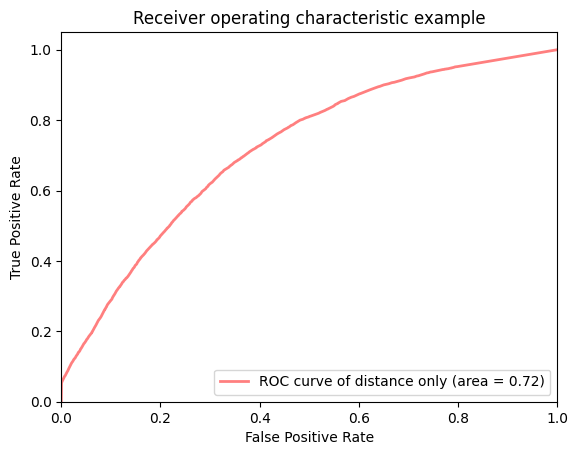

In [34]:
plt.figure()
lw = 2
plt.plot(fpr_r,tpr_r,color="red",lw=lw,alpha=0.5,label="ROC curve of distance only (area = %0.2f)" % roc_auc_r)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

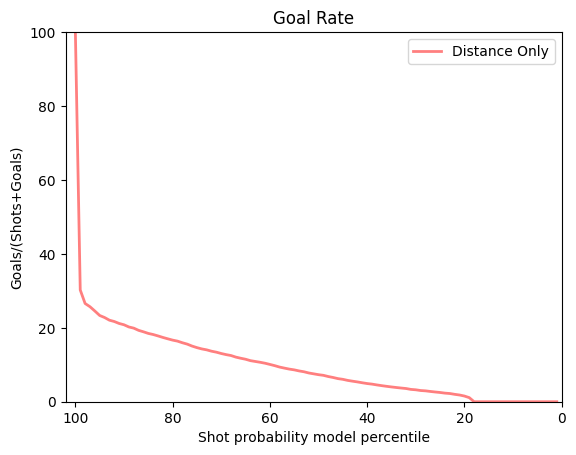

Stored 'cum_values_r' (list)
Stored 'goal_rate_r' (list)
Stored 'perc' (ndarray)


In [12]:
perc, perc_values, num_goals = get_percentile_goal_chance(pred[:,1], y_val_r)
cum_values_r = np.cumsum(num_goals)
sum = np.sum(num_goals)/100
cum_values_r = [i/sum for i in cum_values_r]
plt.figure()
lw = 2
goal_rate_r = [i*100 for i in perc_values]
plt.plot(perc,goal_rate_r,color="red",alpha=0.5,lw=lw,label="Distance Only")
plt.xlim([102, 0])
plt.ylim([0, 100])
plt.xlabel("Shot probability model percentile")
plt.ylabel("Goals/(Shots+Goals)")
plt.title("Goal Rate")
plt.legend(loc="upper right")
plt.show()
%store cum_values_r
%store goal_rate_r
%store perc

In [36]:
exp.log_metric("roc", roc_auc_r)

In [37]:
acc = accuracy_score(y_val_r, guesses)
prec = precision_score(y_val_r, guesses)

In [39]:
exp.log_metric("accuracy", acc)
exp.log_metric("precision", prec)
exp.log_model("decision-tree-best-attempt", r"C:\Users\raph_\OneDrive\Documents\GitHub\ift-6758-a22\Q6_model_Raph.ipynb")
exp.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/teylouniseifu/ift-6758-a22/3d45bcf29a3d44f1892f7c0a0a285537
COMET INFO:   Metrics:
COMET INFO:     accuracy  : 0.9080316685754121
COMET INFO:     precision : 0.878099173553719
COMET INFO:     roc       : 0.7185841420008505
COMET INFO:   Parameters:
COMET INFO:     ccp_alpha                : 0.0
COMET INFO:     class_weight             : 1
COMET INFO:     criterion                : gini
COMET INFO:     max_depth                : 1
COMET INFO:     max_features             : 1
COMET INFO:     max_leaf_nodes           : 1
COMET INFO:     min_impurity_decrease    : 0.0
COMET INFO:     min_samples_leaf         : 1
COMET INFO:     min_samples_split        : 2
COMET INFO:     min_weight_fraction_leaf : 0.0
COMET INFO:     random_state             : 1
COM